## Building a Regression MLP Using the Sequential API

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
housing = fetch_california_housing()

In [4]:
X_train_full,X_test ,y_train_full,y_test  = train_test_split(
    housing.data,housing.target
)

In [5]:
X_train,X_valid,y_train,y_valid = train_test_split(
    X_train_full,
    y_train_full
)

#### building , training , evaluating and using a regression MLP using the Sequential API to make predictions is quite similar to what we did for classification 

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled= scaler.transform(X_test)

##### The main difference are  the fact that the output layer has a single neuron and uses no activation function and the loss function is the *mean_squared_error* since the dataset is quite noisy , we just use a single hidden layer with fewe neurons than before to avoid overfitting 

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss="mean_squared_error",optimizer="sgd")

In [9]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: nan - val_loss: nan
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: nan - val_loss: nan
Epoch 13/20
3

In [10]:
mse_test = model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: nan


In [11]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


## Building Complex Models Using the Functional API

1.  First, we need to create an Input object. This is needed because we may have
multiple inputs, as we will see later.
2. Next, we create a Dense layer with 30 neurons and using the ReLU activation
function. As soon as it is created, notice that we call it like a function, passing it
the input. This is why this is called the Functional API. 


In [12]:
# wide and deep neural network 
input = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input,hidden2])
output = keras.layers.Dense(1)(concat)
model  = keras.models.Model(inputs=[input],outputs=[output])

In [13]:
# Handling multiple outputs 
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [14]:
model.compile(loss="mse", optimizer="sgd")
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: nan

/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_8', 'keras_tensor_9']. Received: the structure of inputs=('*', '*')
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: nan - val_loss: nan
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: nan - val_loss: nan
Epoch 13/20
363/363 ━━━━

### Building Dynamic Models Using the Subclassing API


In [15]:
class WideandDeepModel(keras.models.Model):
    def __init__(self,layer = 30,activation = "relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(layer,activation=activation)
        self.hidden2 = keras.layers.Dense(layer,activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self,inputs):
        input_A,input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate()([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output , aux_output
    
model = WideandDeepModel()

### Saving and Restoring Mode

In [16]:
model.save("my_keras_model.keras")

/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/saving/saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [17]:
model = keras.models.load_model("my_keras_model.h5",custom_objects={"WideandDeepModel":WideandDeepModel})

### callbacks 

In [18]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras")
history = model.fit(X_train,y_train,epochs=20,callbacks=[checkpoint_cb])

ValueError: You must call `compile()` before using the model.

In [ ]:
import os 
root_logdir =  os.path.join(os.curdir , "my-logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

In [ ]:
run_logdir = get_run_logdir()

### Fine Tunning neural network Hyperparameters 

In [ ]:
def build_model(n_hidden =1, n_neurons = 30 , learning_rate = 3e-3,input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape":input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="relu",**options))
        options={}
    model.add(keras.layers.Dense(1,**options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse",optimizer=optimizer)
    return model

In [ ]:
from  scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(build_model)

ImportError: cannot import name '_fit_context' from 'sklearn.base' (/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/sklearn/base.py)

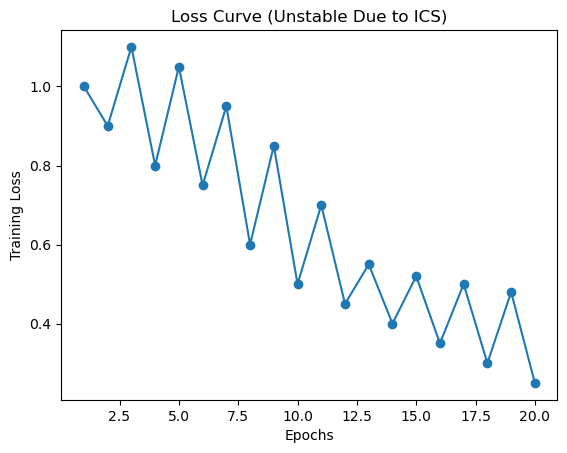

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, 21))
loss_values = [1.0, 0.9, 1.1, 0.8, 1.05, 0.75, 0.95, 0.6, 0.85, 0.5, 0.7, 0.45, 0.55, 0.4, 0.52, 0.35, 0.5, 0.3, 0.48, 0.25]

plt.plot(epochs, loss_values, marker="o", linestyle="-")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Loss Curve (Unstable Due to ICS)")
plt.show()


### Transfer Learning with Keras 

In [ ]:
model_A = keras.models.load_model("my_keras_model.h5",custom_objects={"WideandDeepModel":WideandDeepModel})

In [ ]:
model_b_on_a = keras.models.Sequential(model_A.layers[:-1])

In [ ]:
model_b_on_a.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
for layer in model_b_on_a.layers[:-1]:
    layer.trainable=False
model_b_on_a.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [ ]:
history = model_b_on_a.fit(X_train,y_train,epochs=4,
                           validation_data=(X_valid,y_valid))

Epoch 1/4


2025-02-13 16:56:56.712773: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: In[0] and In[1] has different ndims: [32,8] vs. [0]
	 [[{{function_node __inference_one_step_on_data_25584}}{{node sequential_8_1/dense_53_1/MatMul}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_8_1/dense_53_1/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/7z/kfcjh8xj1wbc9dktydd14w540000gn/T/ipykernel_99797/1497558752.py", line 1, in <module>

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/models/sequential.py", line 213, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/models/functional.py", line 182, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/models/functional.py", line 584, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 144, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/numpy.py", line 3733, in matmul

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/numpy.py", line 477, in matmul

In[0] and In[1] has different ndims: [32,8] vs. [0]
	 [[{{node sequential_8_1/dense_53_1/MatMul}}]] [Op:__inference_one_step_on_iterator_25617]

In [ ]:
for layer in model_b_on_a.layers[:-1]:
    layer.trainable = True

In [ ]:
optimizer =  keras.optimizers.SGD(learning_rate=1e-4)
model_b_on_a.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["accuracy"])

In [ ]:
history = model_b_on_a.fit(X_train,y_train,epochs=16,validation_data=(X_valid,y_valid))

Epoch 1/16


2025-02-13 16:59:50.535098: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: In[0] and In[1] has different ndims: [32,8] vs. [0]
	 [[{{function_node __inference_one_step_on_data_26276}}{{node sequential_8_1/dense_53_1/MatMul}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_8_1/dense_53_1/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/7z/kfcjh8xj1wbc9dktydd14w540000gn/T/ipykernel_99797/3469810886.py", line 1, in <module>

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/models/sequential.py", line 213, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/models/functional.py", line 182, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/models/functional.py", line 584, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 144, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/numpy.py", line 3733, in matmul

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/numpy.py", line 477, in matmul

In[0] and In[1] has different ndims: [32,8] vs. [0]
	 [[{{node sequential_8_1/dense_53_1/MatMul}}]] [Op:__inference_one_step_on_iterator_26309]

In [ ]:
model_b_on_a.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,235 (4.83 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_b_on_a.evaluate(X_test,y_test)

InvalidArgumentError: Graph execution error:

Detected at node sequential_8_1/dense_53_1/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/7z/kfcjh8xj1wbc9dktydd14w540000gn/T/ipykernel_99797/1742426331.py", line 1, in <module>

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 432, in evaluate

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 165, in one_step_on_iterator

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 154, in one_step_on_data

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 82, in test_step

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/models/sequential.py", line 213, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/models/functional.py", line 182, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/models/functional.py", line 584, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/layers/core/dense.py", line 144, in call

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/ops/numpy.py", line 3733, in matmul

  File "/opt/anaconda3/envs/Data_pytorcch/lib/python3.11/site-packages/keras/src/backend/tensorflow/numpy.py", line 477, in matmul

In[0] and In[1] has different ndims: [32,8] vs. [0]
	 [[{{node sequential_8_1/dense_53_1/MatMul}}]] [Op:__inference_one_step_on_iterator_26486]